# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

644

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
#sample api call for reference
url="http://api.openweathermap.org/data/2.5/weather?"
sample_query = url + "appid=" + weather_api_key + "&q=" + "Lakewood"
sample_response = requests.get(sample_query).json()
pprint(sample_response)


{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 39.7, 'lon': -105.08},
 'dt': 1603306285,
 'id': 5427946,
 'main': {'feels_like': 289.75,
          'humidity': 38,
          'pressure': 1011,
          'temp': 291.44,
          'temp_max': 293.71,
          'temp_min': 289.82},
 'name': 'Lakewood',
 'sys': {'country': 'US',
         'id': 2036196,
         'sunrise': 1603286235,
         'sunset': 1603325528,
         'type': 3},
 'timezone': -21600,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 344, 'gust': 0.89, 'speed': 0.45}}


In [6]:
url="http://api.openweathermap.org/data/2.5/weather?"
units="imperial"

Lat = []
Long = []
Max_Temp=[]
Humidity=[]
Cloudiness=[]
Wind_Speed=[]
Country=[]
Date=[]
Found_City=[]

for x in range(len(cities)):
    query_url = url + "appid=" + weather_api_key + "&q=" + str(cities[x] + "&units=" + units)
    response = requests.get(query_url).json()
    print(f"Processing Record {x} for city: {cities[x]}")
    try:
        
        Lat.append(response['coord']['lat'])
        Long.append(response['coord']['lon'])
        Max_Temp.append(response['main']['temp_max'])
        Humidity.append(response['main']['humidity'])
        Cloudiness.append(response['clouds']['all'])
        Wind_Speed.append(response['wind']['speed'])
        Country.append(response['sys']['country'])
        Date.append(response['dt'])
        Found_City.append(response['name'])
        
    except:
        print(f"{cities[x]} not found")
        pass

print("Processing Complete")

     
    

Processing Record 0 for city: okhotsk
Processing Record 1 for city: edmundston
Processing Record 2 for city: campo de criptana
Processing Record 3 for city: ushuaia
Processing Record 4 for city: yanan
yanan not found
Processing Record 5 for city: talnakh
Processing Record 6 for city: burica
burica not found
Processing Record 7 for city: sicamous
Processing Record 8 for city: yarke pole
Processing Record 9 for city: punta arenas
Processing Record 10 for city: tondano
Processing Record 11 for city: avarua
Processing Record 12 for city: dudinka
Processing Record 13 for city: nikolskoye
Processing Record 14 for city: saleaula
saleaula not found
Processing Record 15 for city: illoqqortoormiut
illoqqortoormiut not found
Processing Record 16 for city: thompson
Processing Record 17 for city: yulara
Processing Record 18 for city: busselton
Processing Record 19 for city: bonthe
Processing Record 20 for city: wetter
Processing Record 21 for city: arraial do cabo
Processing Record 22 for city: san

Processing Record 193 for city: turhal
Processing Record 194 for city: gat
Processing Record 195 for city: povenets
Processing Record 196 for city: bengkulu
Processing Record 197 for city: krasnyy chikoy
Processing Record 198 for city: cap malheureux
Processing Record 199 for city: ulaangom
Processing Record 200 for city: cancun
Processing Record 201 for city: hervey bay
Processing Record 202 for city: petropavlovsk-kamchatskiy
Processing Record 203 for city: sibolga
Processing Record 204 for city: fortuna
Processing Record 205 for city: tilichiki
Processing Record 206 for city: namikupa
Processing Record 207 for city: ostersund
Processing Record 208 for city: camargo
Processing Record 209 for city: fevralsk
fevralsk not found
Processing Record 210 for city: saint george
Processing Record 211 for city: touros
Processing Record 212 for city: yar-sale
Processing Record 213 for city: bousse
Processing Record 214 for city: the valley
Processing Record 215 for city: east london
Processing R

Processing Record 382 for city: viedma
Processing Record 383 for city: salvador
Processing Record 384 for city: paciran
Processing Record 385 for city: umzimvubu
umzimvubu not found
Processing Record 386 for city: kiama
Processing Record 387 for city: ayagoz
Processing Record 388 for city: beruwala
Processing Record 389 for city: louisbourg
louisbourg not found
Processing Record 390 for city: karacabey
Processing Record 391 for city: basco
Processing Record 392 for city: golspie
Processing Record 393 for city: xuanwu
Processing Record 394 for city: saint-georges
Processing Record 395 for city: arlit
Processing Record 396 for city: yala
Processing Record 397 for city: cheuskiny
cheuskiny not found
Processing Record 398 for city: pringsewu
Processing Record 399 for city: ola
Processing Record 400 for city: qasigiannguit
Processing Record 401 for city: lincoln
Processing Record 402 for city: chapais
Processing Record 403 for city: port hardy
Processing Record 404 for city: puerto baqueriz

Processing Record 576 for city: jardim
Processing Record 577 for city: oranjemund
Processing Record 578 for city: razole
Processing Record 579 for city: lodja
Processing Record 580 for city: aripuana
Processing Record 581 for city: port blair
Processing Record 582 for city: samoylovka
Processing Record 583 for city: irricana
Processing Record 584 for city: ilulissat
Processing Record 585 for city: rio grande
Processing Record 586 for city: alta floresta
Processing Record 587 for city: zonguldak
Processing Record 588 for city: bambanglipuro
Processing Record 589 for city: ranong
Processing Record 590 for city: parainen
Processing Record 591 for city: santa maria
Processing Record 592 for city: galiwinku
galiwinku not found
Processing Record 593 for city: adrar
Processing Record 594 for city: itarema
Processing Record 595 for city: sangar
Processing Record 596 for city: ronneby
Processing Record 597 for city: acapulco
Processing Record 598 for city: karaton
Processing Record 599 for city

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
print(len(Lat))
print(len(Long))
print(len(Max_Temp))
print(len(Humidity))
print(len(Cloudiness))
print(len(Wind_Speed))
print(len(Country))
print(len(Date))
print(len(Found_City))

city_df=pd.DataFrame({'City':Found_City,
                     'Lat':Lat,
                     'Lng':Long,
                     'Max Temp':Max_Temp,
                     'Humidity':Humidity,
                     'Cloudiness':Cloudiness,
                     'Wind Speed':Wind_Speed,
                     'Country':Country,
                     'Date':Date})
city_df.head()


594
594
594
594
594
594
594
594
594


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Okhotsk,59.38,143.30,31.19,96,99,14.05,RU,1603306297
1,Edmundston,47.37,-68.33,39.99,93,90,13.87,CA,1603306529
2,Campo de Criptana,39.40,-3.12,55.99,76,100,4.00,ES,1603306530
3,Ushuaia,-54.80,-68.30,55.40,43,75,16.11,AR,1603306261
4,Talnakh,69.49,88.40,12.20,85,100,13.42,RU,1603306530


In [8]:
city_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,5.940000e+02
mean,21.005118,19.585370,60.888502,72.500000,55.324916,7.978165,1.603307e+09
std,33.017347,88.827227,21.390586,21.596815,39.807596,5.388249,9.715205e+01
min,-54.800000,-179.170000,4.370000,8.000000,0.000000,0.380000,1.603306e+09
25%,-6.325000,-56.147500,43.722500,64.000000,11.000000,3.690000,1.603307e+09
50%,25.410000,23.930000,65.525000,77.000000,75.000000,6.710000,1.603307e+09
75%,49.727500,99.745000,78.240000,88.000000,93.750000,11.232500,1.603307e+09
max,78.220000,178.420000,104.580000,100.000000,100.000000,29.970000,1.603307e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
city_df2=city_df.loc[(city_df['Humidity']>100)]
city_df2

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [10]:
#  Get the indices of cities that have humidity over 100%.
#Not applicable

In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
#not applicable

In [12]:
city_df.head()




,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Okhotsk,59.38,143.30,31.19,96,99,14.05,RU,1603306297
1,Edmundston,47.37,-68.33,39.99,93,90,13.87,CA,1603306529
2,Campo de Criptana,39.40,-3.12,55.99,76,100,4.00,ES,1603306530
3,Ushuaia,-54.80,-68.30,55.40,43,75,16.11,AR,1603306261
4,Talnakh,69.49,88.40,12.20,85,100,13.42,RU,1603306530


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

<function matplotlib.pyplot.show(close=None, block=None)>

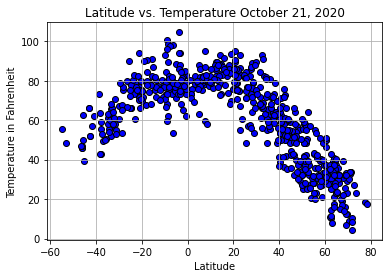

In [13]:
plt.scatter(city_df['Lat'],city_df['Max Temp'],facecolors='b',edgecolors='black')
plt.title('Latitude vs. Temperature October 21, 2020')
plt.xlabel('Latitude')
plt.ylabel('Temperature in Fahrenheit')
plt.grid()
plt.savefig("images/lat_vs_temp.png")
plt.show


## Latitude vs. Humidity Plot

<function matplotlib.pyplot.show(close=None, block=None)>

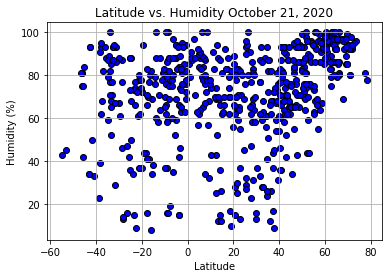

In [14]:
plt.scatter(city_df['Lat'],city_df['Humidity'],facecolors='b',edgecolors='black')
plt.title('Latitude vs. Humidity October 21, 2020')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.savefig("images/lat_vs_hum.png")
plt.show

## Latitude vs. Cloudiness Plot

<function matplotlib.pyplot.show(close=None, block=None)>

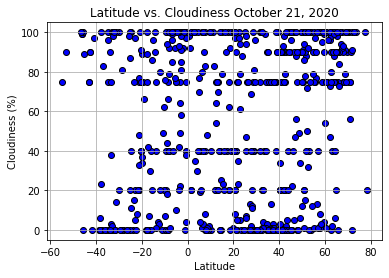

In [15]:
plt.scatter(city_df['Lat'],city_df['Cloudiness'],facecolors='b',edgecolors='black')
plt.title('Latitude vs. Cloudiness October 21, 2020')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.savefig("images/lat_vs_cld.png")
plt.show

## Latitude vs. Wind Speed Plot

<function matplotlib.pyplot.show(close=None, block=None)>

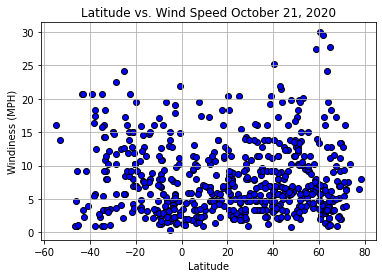

In [16]:
plt.scatter(city_df['Lat'],city_df['Wind Speed'],facecolors='b',edgecolors='black')
plt.title('Latitude vs. Wind Speed October 21, 2020')
plt.xlabel('Latitude')
plt.ylabel('Windiness (MPH)')
plt.grid()
plt.savefig("images/lat_vs_wind.png")
plt.show

## Linear Regression

In [17]:
north_df=city_df.loc[(city_df['Lat']>0)]
south_df=city_df.loc[(city_df['Lat']<0)]
north_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Okhotsk,59.38,143.30,31.19,96,99,14.05,RU,1603306297
1,Edmundston,47.37,-68.33,39.99,93,90,13.87,CA,1603306529
2,Campo de Criptana,39.40,-3.12,55.99,76,100,4.00,ES,1603306530
4,Talnakh,69.49,88.40,12.20,85,100,13.42,RU,1603306530
5,Sicamous,50.83,-118.99,42.01,84,94,2.39,CA,1603306530
...,...,...,...,...,...,...,...,...,...
583,Kisláng,46.96,18.39,57.99,65,47,5.99,HU,1603306645
587,Dolni Dabnik,43.40,24.43,51.80,62,5,2.24,BG,1603306646
588,Ibrā’,22.69,58.53,67.32,37,79,3.31,OM,1603306365
590,Līsakovsk,52.54,62.49,39.25,70,100,10.51,KZ,1603306646


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r value is -0.8776698971638399


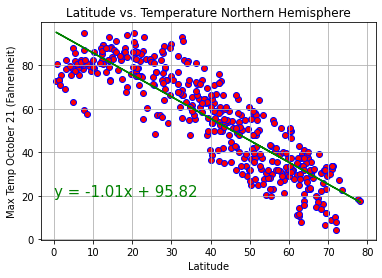

In [19]:
x_axis=north_df['Lat']
y_axis=north_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis,facecolor='r',edgecolor='b')
plt.plot(x_axis,regress_values,"g-")
plt.annotate(line_eq,(0,20),fontsize=15,color="green")
plt.title('Latitude vs. Temperature Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Max Temp October 21 (Fahrenheit)')
plt.grid()

print(f"The r value is {rvalue}")
plt.savefig("images/north_lat_temp.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r value is 0.7064787076018747


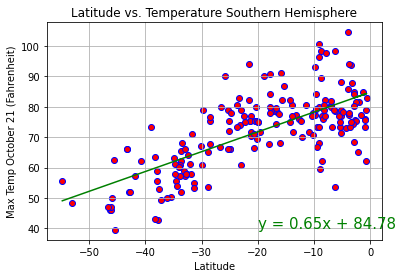

In [21]:
x_axis=south_df['Lat']
y_axis=south_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis,facecolor='r',edgecolor='b')
plt.plot(x_axis,regress_values,"g-")
plt.annotate(line_eq,(-20,40),fontsize=15,color="green")
plt.title('Latitude vs. Temperature Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Max Temp October 21 (Fahrenheit)')
plt.grid()

print(f"The r value is {rvalue}")
plt.savefig("images/south_lat_temp.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r value is 0.3861689408105353


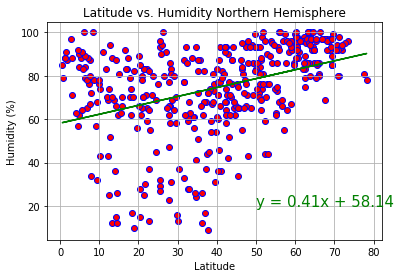

In [22]:
x_axis=north_df['Lat']
y_axis=north_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis,facecolor='r',edgecolor='b')
plt.plot(x_axis,regress_values,"g-")
plt.annotate(line_eq,(50,20),fontsize=15,color="green")
plt.title('Latitude vs. Humidity Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()

print(f"The r value is {rvalue}")
plt.savefig("images/north_lat_hum.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r value is 0.06019056671225537


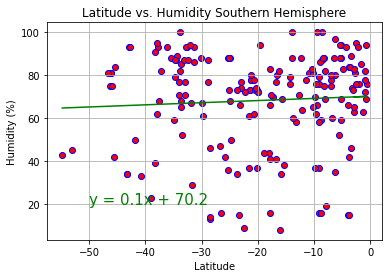

In [23]:
x_axis=south_df['Lat']
y_axis=south_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis,facecolor='r',edgecolor='b')
plt.plot(x_axis,regress_values,"g-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="green")
plt.title('Latitude vs. Humidity Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()

print(f"The r value is {rvalue}")
plt.savefig("images/south_lat_hum.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r value is 0.2704161610672508


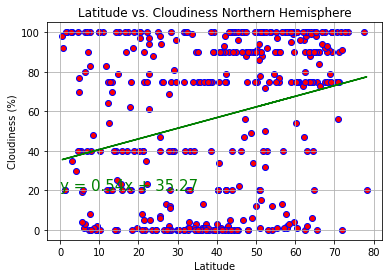

In [24]:
x_axis=north_df['Lat']
y_axis=north_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis,facecolor='r',edgecolor='b')
plt.plot(x_axis,regress_values,"g-")
plt.annotate(line_eq,(0,20),fontsize=15,color="green")
plt.title('Latitude vs. Cloudiness Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()

print(f"The r value is {rvalue}")
plt.savefig("images/north_lat_cloud.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r value is 0.12815501087383468


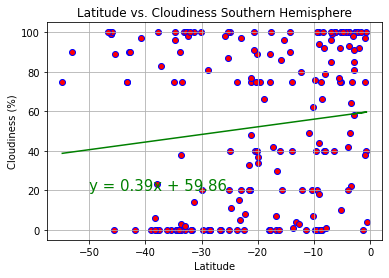

In [25]:
x_axis=south_df['Lat']
y_axis=south_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis,facecolor='r',edgecolor='b')
plt.plot(x_axis,regress_values,"g-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="green")
plt.title('Latitude vs. Cloudiness Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()

print(f"The r value is {rvalue}")
plt.savefig("images/north_lat_cloud.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r value is 0.10369885709625293


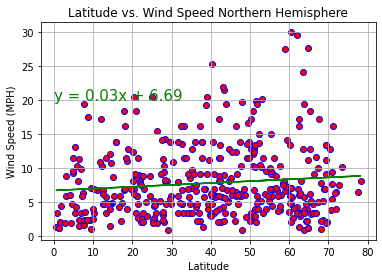

In [26]:
x_axis=north_df['Lat']
y_axis=north_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis,facecolor='r',edgecolor='b')
plt.plot(x_axis,regress_values,"g-")
plt.annotate(line_eq,(0,20),fontsize=15,color="green")
plt.title('Latitude vs. Wind Speed Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')
plt.grid()

print(f"The r value is {rvalue}")
plt.savefig("images/north_lat_wind.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r value is -0.15092077843893914


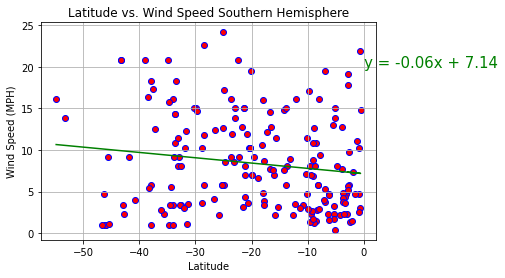

In [27]:
x_axis=south_df['Lat']
y_axis=south_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis,facecolor='r',edgecolor='b')
plt.plot(x_axis,regress_values,"g-")
plt.annotate(line_eq,(0,20),fontsize=15,color="green")
plt.title('Latitude vs. Wind Speed Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')
plt.grid()

print(f"The r value is {rvalue}")
plt.savefig("images/south_lat_wind.png")
plt.show()

In [28]:
#export csv of raw data
city_df.to_csv('city_data.csv',index=True,header=True)